KKBox's Churn Prediction Challenge
=======
test model

The data set has been balanced. AUC, ROC, and K-S curve are used in the program to evaluate the model.

In [4]:
import pandas as pd
import warnings
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
%matplotlib inline
import matplotlib.pyplot as plt
import graphviz
from rfpimp import plot_corr_heatmap
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from matplotlib import animation
%matplotlib notebook
import matplotlib.animation
##<div class="alert alert-info"><h4>Note</h4><p>小摘</p></div>
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from sklearn.preprocessing import StandardScaler

註記：檔案已處理資料不平衡問題

In [5]:
data_all = pd.read_csv('KKboxProgram3rdFinal_balance.csv')
#, encoding='gbk'

In [6]:
y=data_all['is_churn']
X_org = data_all.drop(labels=["msno","is_churn",'A_0days',
 'B_7days',
 'C_30days_month',
 'D_30days_acount',
 'E_90days',
 'F_90days_discount',
 'G_100days_card',
 'H_120days_season',
 'I_halfyear',
 'J_180days_discount',
 'K_200days_card',
 'L_360days_year',
 'M_395days',
 'N_410days_discount',
 'O_450days',"('num_unq', 'mean')",'payment_method_id_mode',
 'payment_plan_days_mode','registration_init_time'], axis="columns")
X=scale(X_org)  #正規化

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

Test 30%

In [8]:
lr = LogisticRegression(random_state=2018,tol=1e-6)  # 邏輯迴歸模型

dtree = DecisionTreeClassifier(random_state=2018) #決策樹模型

svm = SVC(probability=True,random_state=2018,tol=1e-6)  # SVM模型

rfc=RandomForestClassifier(n_estimators=100,random_state=2018) #　隨機森林

Gbdt=GradientBoostingClassifier(random_state=2018) #GBDT

Xgbc=XGBClassifier(random_state=2018)  #Xgbc

Lgbm=lgb.LGBMClassifier(random_state=2018)  #lgbm

In [9]:
def muti_score(model):
    warnings.filterwarnings('ignore')
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    precision = cross_val_score(model, X, y, scoring='precision', cv=5)
    recall = cross_val_score(model, X, y, scoring='recall', cv=5)
    f1_score = cross_val_score(model, X, y, scoring='f1', cv=5)
    auc = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    scores = cross_val_score(model, X, y, cv=5)
    #print("Accuracy:",accuracy.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean()*100, 100*accuracy.std() * 2))
    print("Precision:",precision.mean()*100)
    print("ReCall:",recall.mean()*100)
    print("F1_score:",f1_score.mean()*100)
    print("AUC:",auc.mean()*100)

受限於本次專題時間，採用5折交叉驗證，理論上建議採用10折

In [10]:
model_name=["lr","dtree","rfc","Xgbc","Lgbm","Gbdt"]
#,"svm"
for name in model_name:
    model=eval(name)
    print(name)
    muti_score(model)

lr
Accuracy: 77.56 (+/- 0.83)
Precision: 79.98289321811576
ReCall: 68.61610917324707
F1_score: 73.86292337030028
AUC: 83.10100057966478
dtree
Accuracy: 75.25 (+/- 0.67)
Precision: 73.21688690620998
ReCall: 73.26201976847788
F1_score: 73.23928756853869
AUC: 76.25291139088118
rfc
Accuracy: 81.48 (+/- 0.39)
Precision: 83.54915317903269
ReCall: 74.63490691584721
F1_score: 78.84005579097828
AUC: 87.73665177529463
Xgbc
Accuracy: 80.94 (+/- 0.45)
Precision: 84.13745530241476
ReCall: 72.45218248112187
F1_score: 77.84703404966713
AUC: 88.60705974748721
Lgbm
Accuracy: 82.57 (+/- 0.33)
Precision: 84.42895978002318
ReCall: 76.40264227197345
F1_score: 80.20977151779964
AUC: 89.51631849108314
Gbdt
Accuracy: 81.01 (+/- 0.53)
Precision: 83.90677496966661
ReCall: 72.91657992198388
F1_score: 78.01384877091976
AUC: 88.64937738874596


本次採用指標          
===========
(unit:%)

|              Algorithm              | Precision |   ReCall  | F1_score |    AUC    |     
|           ---------------           | --------- |   ------  | -------- |    ---    |   
|          Linear regression          |   80.0%   |    68.6%  |   73.9%  |   83.1%   |   
|           Decision tree             |   73.2%   |    73.3%  |   73.2%  |   76.3%   |   
|           Random Forest             |   83.5%   |    74.6%  |   78.8%  |   87.7%   |   
|               XGboost               |   84.1%   |    72.5%  |   77.8%  |   88.6%   |   
|              Lightgbm               |   84.4%   |    76.4%  |   80.2%  |   89.5%   |   
|                Gbdt                 |   83.9%   |    72.9%  |   78.0%  |   88.6%   | 



In [7]:
lr.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rfc.fit(X_train, y_train)
Xgbc.fit(X_train, y_train)
Lgbm.fit(X_train, y_train)
Gbdt.fit(X_train, y_train)
#svm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=2018,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [8]:
lr_pred = lr.predict(X_test)
dtree_pred = dtree.predict(X_test)
rfc_pred = rfc.predict(X_test)
Xgbc_pred = Xgbc.predict(X_test)
Lgbm_pred = Lgbm.predict(X_test)
Gbdt_pred = Gbdt.predict(X_test)
#svm_pred = svm.predict(X_test)

In [9]:
lr_pred_proba = lr.predict_proba(X_test)
dtree_pred_proba = dtree.predict_proba(X_test)
rfc_pred_proba = rfc.predict_proba(X_test)
Xgbc_pred_proba = Xgbc.predict_proba(X_test)
Lgbm_pred_proba = Lgbm.predict_proba(X_test)
Gbdt_pred_proba = Gbdt.predict_proba(X_test)
#svm_pred = svm.predict(X_test)

In [10]:
fpr0, tpr0, thresholds0 = roc_curve(y_test, lr_pred_proba[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, dtree_pred_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, rfc_pred_proba[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, Xgbc_pred_proba[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, Lgbm_pred_proba[:,1])
fpr6, tpr6, thresholds6 = roc_curve(y_test, Gbdt_pred_proba[:,1])
#fpr7, tpr7, thresholds7 = roc_curve(y_test, svm_pred_proba[:,1])

|代碼 |  顏色   |  中文   |  模型   |
|----|  ------ |  ------ |  ------ |
|b   |	 blue  |  藍色   |lr |
|g   | 	green  |  綠色   |dtree |
|r   |	 red   |  紅色   |rfc |
|c   | 	cyan   |  青色   |Xgbc |
|m   |	magenta|  品紅(紫色)|Lgbm|
|y   |	yellow |  黃色   |Gbdt|
|k   |	black  |  黑色   |test |

ROCcurve
-------------

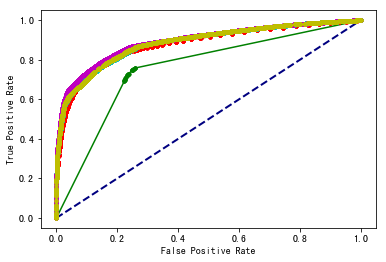

In [50]:
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr0, tpr0, color='b', marker='.')
plt.plot(fpr1, tpr1, color='g', marker='.')
plt.plot(fpr2, tpr2, color='r', marker='.')
plt.plot(fpr3, tpr3, color='c', marker='.')
plt.plot(fpr4, tpr4, color='m', marker='.')
plt.plot(fpr6, tpr6, color='y', marker='.')
#plt.plot(fpr7, tpr7, color='k', marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [11]:
pre0, rec0, thresholds0 = precision_recall_curve(y_test, lr_pred_proba[:,1])
pre1, rec1, thresholds1 = precision_recall_curve(y_test, dtree_pred_proba[:,1])
pre2, rec2, thresholds2 = precision_recall_curve(y_test, rfc_pred_proba[:,1])
pre3, rec3, thresholds3 = precision_recall_curve(y_test, Xgbc_pred_proba[:,1])
pre4, rec4, thresholds4 = precision_recall_curve(y_test, Lgbm_pred_proba[:,1])
pre6, rec6, thresholds0 = precision_recall_curve(y_test, Gbdt_pred_proba[:,1])
#pre7, rec7, thresholds0 = precision_recall_curve(y_test, svm_pred_proba[:,1])

PRCcurve
-------------

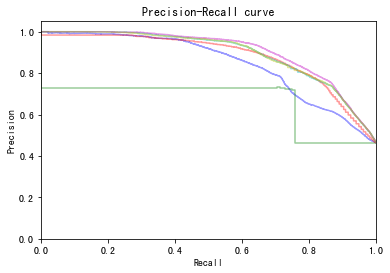

In [13]:
#f1_scores = 2*(pre0*rec0)/(pre0+rec0)
plt.step(rec0, pre0, color='b', alpha=0.4, where='post')
plt.step(rec1, pre1, color='g', alpha=0.4, where='post')
plt.step(rec2, pre2, color='r', alpha=0.4, where='post')
plt.step(rec3, pre3, color='c', alpha=0.4, where='post')
plt.step(rec4, pre4, color='m', alpha=0.4, where='post')
plt.step(rec6, pre6, color='y', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

Spearman's rank correlation coefficient
-------------

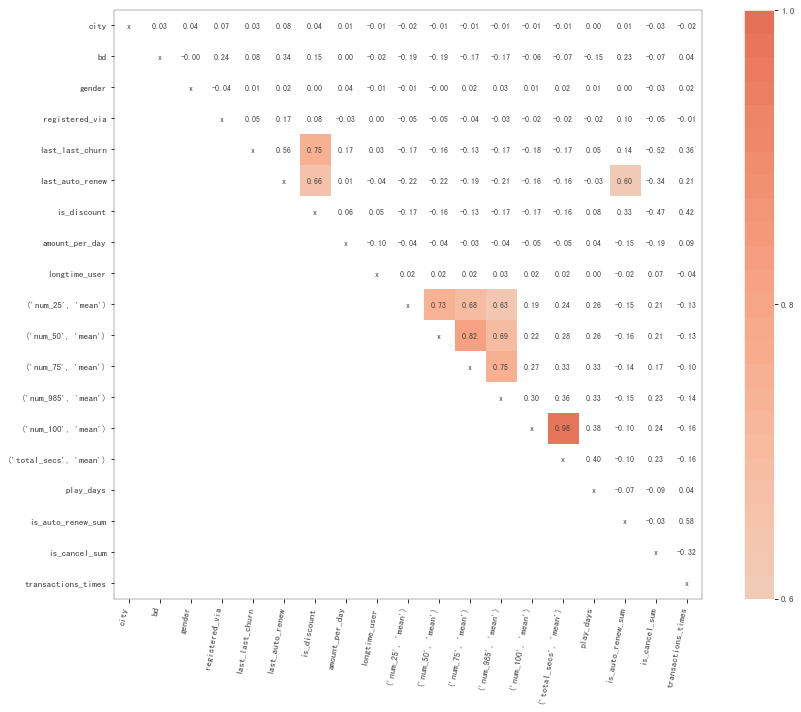

In [40]:
viz = plot_corr_heatmap(X_org, figsize=(15,10))
viz.view()

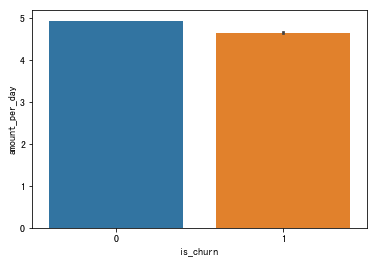

In [41]:
sns.barplot(y_train, X_org['amount_per_day'])

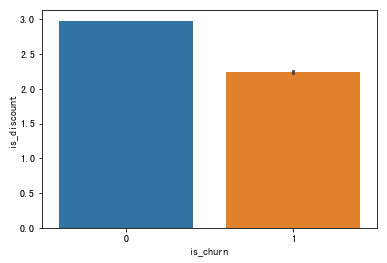

In [43]:
sns.barplot(y_train, X_org['is_discount'])

F1 and PR surface
-------------

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


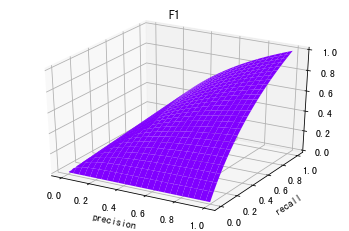

In [12]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111,projection='3d')
xpr3 = np.linspace(0,1,100)
P, R = np.meshgrid(xpr3, xpr3)
Z = 2*P*R/(P+R)
ax.plot_surface(P, R, Z, rstride = 4, cstride = 4, cmap = plt.get_cmap('rainbow'))
ax.set_title('F1')
ax.set_xlabel('precision')
ax.set_ylabel('recall')
plt.show()

In [23]:
#pre3, rec3, thresholds3 = precision_recall_curve(y_test, Xgbc_pred_proba[:,1])
#P, R = np.meshgrid(pre3, rec3)
P = pre3
R = rec3
P, R = np.meshgrid(P, R)

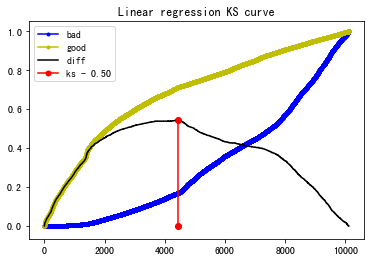

In [24]:
lw = 2
ks_value0 = max(tpr0-fpr0)
plt.plot(fpr0, color='b', label='bad', marker='.')
#plt.plot(fpr1, color='g', label='bad', marker='.')
#plt.plot(fpr2, color='r', label='bad', marker='.')
#plt.plot(fpr3, color='c', label='bad', marker='.')
#plt.plot(fpr4, color='m', label='bad', marker='.')
plt.plot(tpr0, color='y', label='good', marker='.')
plt.plot(tpr0-fpr0, color='k', label='diff')
#plt.plot(fpr6, tpr6, color='y', label='bad', marker='.')
#plt.plot(fpr7, tpr7, color='k', label='bad', marker='.')
x0 = np.argwhere((tpr0-fpr0) == ks_value0)[0, 0]
plt.plot((x0, x0), (0, ks_value0), label='ks - {:.2f}'.format(ks_value1), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x0, x0), (0, ks_value0), color='r')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('Linear regression KS curve')
plt.show()


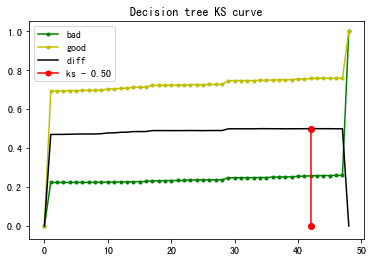

In [25]:
lw = 2
ks_value1 = max(tpr1-fpr1)
#plt.plot(fpr0, color='b', label='bad', marker='.')
plt.plot(fpr1, color='g', label='bad', marker='.')
#plt.plot(fpr2, color='r', label='bad', marker='.')
#plt.plot(fpr3, color='c', label='bad', marker='.')
#plt.plot(fpr4, color='m', label='bad', marker='.')
plt.plot(tpr1, color='y', label='good', marker='.')
plt.plot(tpr1-fpr1, color='k', label='diff')
#plt.plot(fpr6, tpr6, color='y', label='bad', marker='.')
#plt.plot(fpr7, tpr7, color='k', label='bad', marker='.')
x1 = np.argwhere((tpr1-fpr1) == ks_value1)[0, 0]
plt.plot((x1, x1), (0, ks_value1), label='ks - {:.2f}'.format(ks_value1), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x1, x1), (0, ks_value1), color='r')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('Decision tree KS curve')
plt.show()

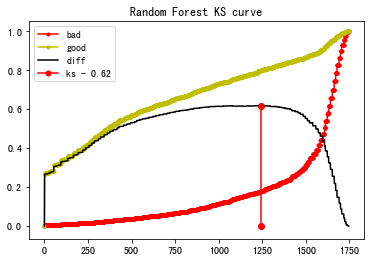

In [26]:
lw = 2
ks_value2 = max(tpr2-fpr2)
#plt.plot(fpr0, color='b', label='bad', marker='.')
#plt.plot(fpr1, color='g', label='bad', marker='.')
plt.plot(fpr2, color='r', label='bad', marker='.')
#plt.plot(fpr3, color='c', label='bad', marker='.')
#plt.plot(fpr4, color='m', label='bad', marker='.')
plt.plot(tpr2, color='y', label='good', marker='.')
plt.plot(tpr2-fpr2, color='k', label='diff')
#plt.plot(fpr6, tpr6, color='y', label='bad', marker='.')
#plt.plot(fpr7, tpr7, color='k', label='bad', marker='.')
x2 = np.argwhere((tpr2-fpr2) == ks_value2)[0, 0]
plt.plot((x2, x2), (0, ks_value2), label='ks - {:.2f}'.format(ks_value2), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x2, x2), (0, ks_value2), color='r')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('Random Forest KS curve')
plt.show()

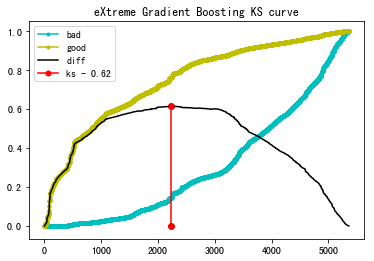

In [27]:
lw = 2
ks_value3 = max(tpr3-fpr3)
#plt.plot(fpr0, color='b', label='bad', marker='.')
#plt.plot(fpr1, color='g', label='bad', marker='.')
#plt.plot(fpr2, color='r', label='bad', marker='.')
plt.plot(fpr3, color='c', label='bad', marker='.')
#plt.plot(fpr4, color='m', label='bad', marker='.')
plt.plot(tpr3, color='y', label='good', marker='.')
plt.plot(tpr3-fpr3, color='k', label='diff')
#plt.plot(fpr6, tpr6, color='y', label='bad', marker='.')
#plt.plot(fpr7, tpr7, color='k', label='bad', marker='.')
x3 = np.argwhere((tpr3-fpr3) == ks_value3)[0, 0]
plt.plot((x3, x3), (0, ks_value3), label='ks - {:.2f}'.format(ks_value3), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x3, x3), (0, ks_value3), color='r')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('eXtreme Gradient Boosting KS curve')
plt.show()

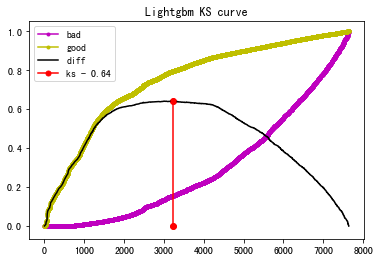

In [28]:
lw = 2
ks_value4 = max(tpr4-fpr4)
#plt.plot(fpr0, color='b', label='bad', marker='.')
#plt.plot(fpr1, color='g', label='bad', marker='.')
#plt.plot(fpr2, color='r', label='bad', marker='.')
#plt.plot(fpr3, color='c', label='bad', marker='.')
plt.plot(fpr4, color='m', label='bad', marker='.')
plt.plot(tpr4, color='y', label='good', marker='.')
plt.plot(tpr4-fpr4, color='k', label='diff')
#plt.plot(fpr6, color='y', label='bad', marker='.')
#plt.plot(fpr7, color='k', label='bad', marker='.')
x4 = np.argwhere((tpr4-fpr4) == ks_value4)[0, 0]
plt.plot((x4, x4), (0, ks_value4), label='ks - {:.2f}'.format(ks_value4), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x4, x4), (0, ks_value4), color='r')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('Lightgbm KS curve')
plt.show()

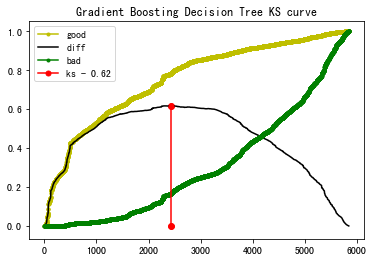

In [29]:
lw = 2
ks_value6 = max(tpr6-fpr6)
#plt.plot(fpr0, color='b', label='bad', marker='.')
#plt.plot(fpr1, color='g', label='bad', marker='.')
#plt.plot(fpr2, color='r', label='bad', marker='.')
#plt.plot(fpr3, color='c', label='bad', marker='.')
#plt.plot(fpr4, color='m', label='bad', marker='.')
plt.plot(tpr6, color='y', label='good', marker='.')
plt.plot(tpr6-fpr6, color='k', label='diff')
plt.plot(fpr6, color='g', label='bad', marker='.')
#plt.plot(fpr7, color='k', label='bad', marker='.')
x6 = np.argwhere((tpr6-fpr6) == ks_value6)[0, 0]
plt.plot((x6, x6), (0, ks_value6), label='ks - {:.2f}'.format(ks_value6), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x6, x6), (0, ks_value6), color='r')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('Gradient Boosting Decision Tree KS curve')
plt.show()

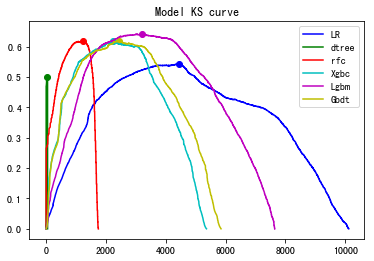

In [45]:
lw = 2
plt.plot(tpr0-fpr0, color='b', label='LR')
plt.plot(tpr1-fpr1, color='g', label='dtree')
plt.plot(tpr2-fpr2, color='r', label='rfc')
plt.plot(tpr3-fpr3, color='c', label='Xgbc')
plt.plot(tpr4-fpr4, color='m', label='Lgbm')
plt.plot(tpr6-fpr6, color='y', label='Gbdt')
#plt.plot(fpr6, color='g', label='bad', marker='.')
#plt.plot(fpr7, color='k', label='bad', marker='.')
x0 = np.argwhere((tpr0-fpr0) == ks_value0)[0, 0]
x1 = np.argwhere((tpr1-fpr1) == ks_value1)[0, 0]
x2 = np.argwhere((tpr2-fpr2) == ks_value2)[0, 0]
x3 = np.argwhere((tpr3-fpr3) == ks_value3)[0, 0]
x4 = np.argwhere((tpr4-fpr4) == ks_value4)[0, 0]
x6 = np.argwhere((tpr6-fpr6) == ks_value6)[0, 0]
#plt.plot((x6, x6), (0, ks_value6), label='ks - {:.2f}'.format(ks_value6), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter(x0, ks_value0, color='b')
plt.scatter(x1, ks_value1, color='g')
plt.scatter(x2, ks_value2, color='r')
plt.scatter(x3, ks_value3, color='c')
plt.scatter(x4, ks_value4, color='m')
plt.scatter(x6, ks_value6, color='y')
plt.legend()
#plt.xlabel('')
#plt.ylabel('')
plt.title('Model KS curve')
plt.show()